In [250]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Zadanie 1

In [251]:
obraz = Image.open('obraz.png')
inicjaly = Image.open('inicjaly.bmp').convert('L')

obraz_copy = obraz.copy()
inicjaly_copy = inicjaly.copy()

Zadanie 2A

In [252]:
def wstaw_inicjaly(obraz, inicjaly, m, n, kolor):
    w, h = obraz.size
    w_in, h_in = inicjaly.size
    for i in range(w_in):
        for j in range(h_in):
            if i + m < w and j + n < h:
                if inicjaly.getpixel((i, j)) == 0:
                    obraz.putpixel((i + m, j + n), kolor)
    return obraz

result_img = wstaw_inicjaly(
    obraz_copy,
    inicjaly_copy,
    obraz.width - inicjaly.width,
    obraz.height - inicjaly.height,
    (255, 0, 0)
)

result_img.save("obraz1.png")

Otrzymany obraz z inicjałami wstawionymi w prawym dolnym rogu w kolorze czerwonym

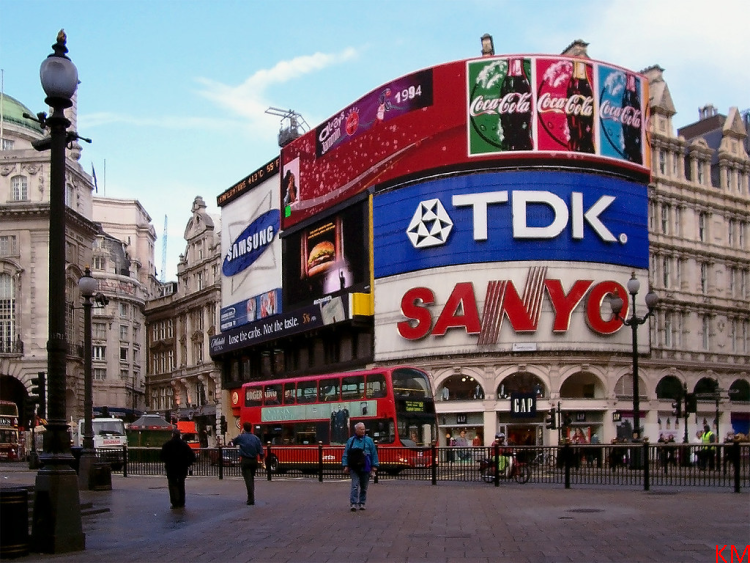

Zadanie 2B

In [253]:
def wstaw_inicjaly_maska(obraz, inicjaly, m, n):
    w, h = obraz.size
    w_in, h_in = inicjaly.size
    for i in range(w_in):
        for j in range(h_in):
            if i + m < w and j + n < h:
                if inicjaly.getpixel((i, j)) == 0:
                    p = obraz.getpixel((i + m, j + n))
                    obraz.putpixel((i + m, j + n), (255 - p[0], 255 - p[1], 255 - p[2]))
    return obraz


obraz_copy=obraz.copy()
inicjaly_copy=inicjaly.copy()

result_img2 = wstaw_inicjaly_maska(
    obraz_copy,
    inicjaly_copy,
    obraz.width // 2 - inicjaly.width // 2, 
    obraz.height // 2 - inicjaly.height // 2
)

result_img2.save("obraz2.png")


Otzymany obraz z inicjałami z pikselami w negatywnie:

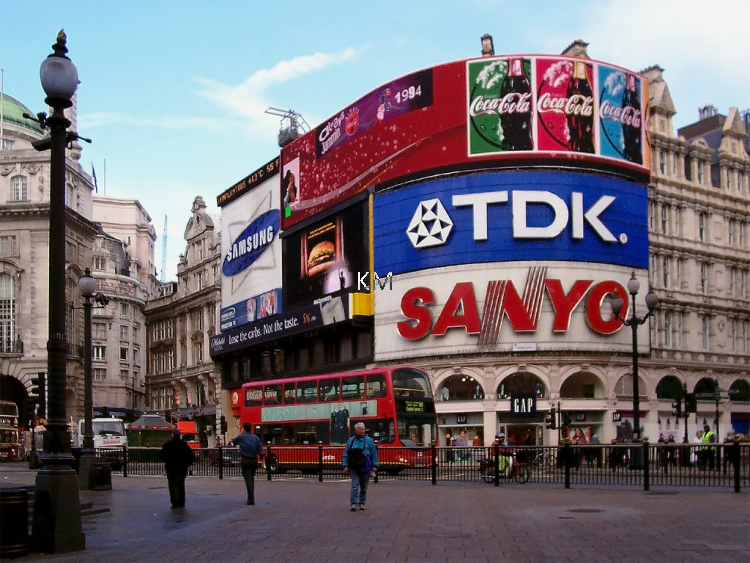

Zadanie 3A

In [254]:
def wstaw_inicjaly_load(obraz, inicjaly, m, n, kolor):
    pix_obraz = obraz.load()
    pix_inicjaly = inicjaly.load()
    w, h = obraz.size
    w_in, h_in = inicjaly.size
    for i in range(w_in):
        for j in range(h_in):
            if i + m < w and j + n < h:
                if pix_inicjaly[i, j] == 0:
                    pix_obraz[i + m, j + n] = kolor
    return obraz



obraz_copy = obraz.copy()
inicjaly_copy = inicjaly.copy()

result_img3 = wstaw_inicjaly_load(
    obraz_copy,
    inicjaly_copy,
    obraz.width - inicjaly.width,
    obraz.height - inicjaly.height,
    (255, 0, 0)
)

result_img3.save("obraz3.png")


Otrzymany obraz z zadania 3A:

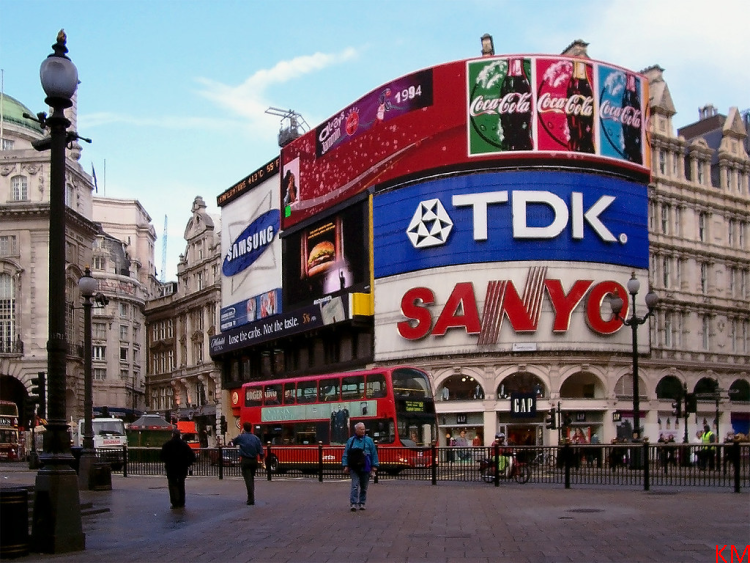

Zadanie 3B

In [255]:
def wstaw_inicjaly_maska_load(obraz, inicjaly, m, n):
    pix_obraz = obraz.load()
    pix_inicjaly = inicjaly.load()
    w, h = obraz.size
    w_in, h_in = inicjaly.size
    for i in range(w_in):
        for j in range(h_in):
            if i + m < w and j + n < h:
                if pix_inicjaly[i, j] == 0:
                    p = pix_obraz[i + m, j + n]
                    pix_obraz[i + m, j + n] = (255 - p[0], 255 - p[1], 255 - p[2])
    return obraz


obraz_copy = obraz.copy()
inicjaly_copy = inicjaly.copy()

result_img4 = wstaw_inicjaly_maska_load(
    obraz_copy,
    inicjaly_copy,
    obraz.width // 2 - inicjaly.width // 2,
    obraz.height // 2 - inicjaly.height // 2
)

result_img4.save("obraz4.png")


Obraz otrzymany w zadaniu 3B:

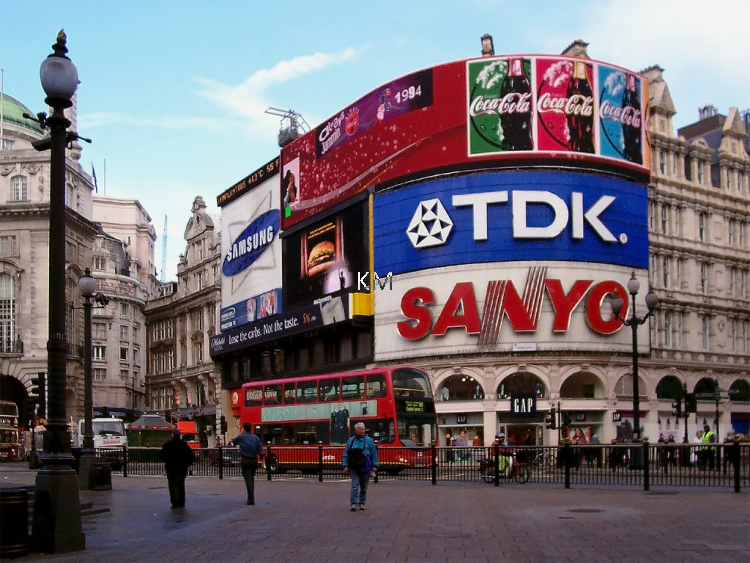

In [256]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Obraz 1 vs Obraz 3
axs[0, 0].imshow(result_img)
axs[0, 0].set_title("Obraz 1: getpixel/putpixel")
axs[0, 0].axis("off")

axs[0, 1].imshow(result_img3)
axs[0, 1].set_title("Obraz 3: load")
axs[0, 1].axis("off")

# Obraz 2 vs Obraz 4
axs[1, 0].imshow(result_img2)
axs[1, 0].set_title("Obraz 2: getpixel/putpixel (Maska)")
axs[1, 0].axis("off")

axs[1, 1].imshow(result_img4)
axs[1, 1].set_title("Obraz 4: load (Maska)")
axs[1, 1].axis("off")

plt.tight_layout()
plt.savefig("fig1.png")
plt.close(fig)


Porównanie obrazów:

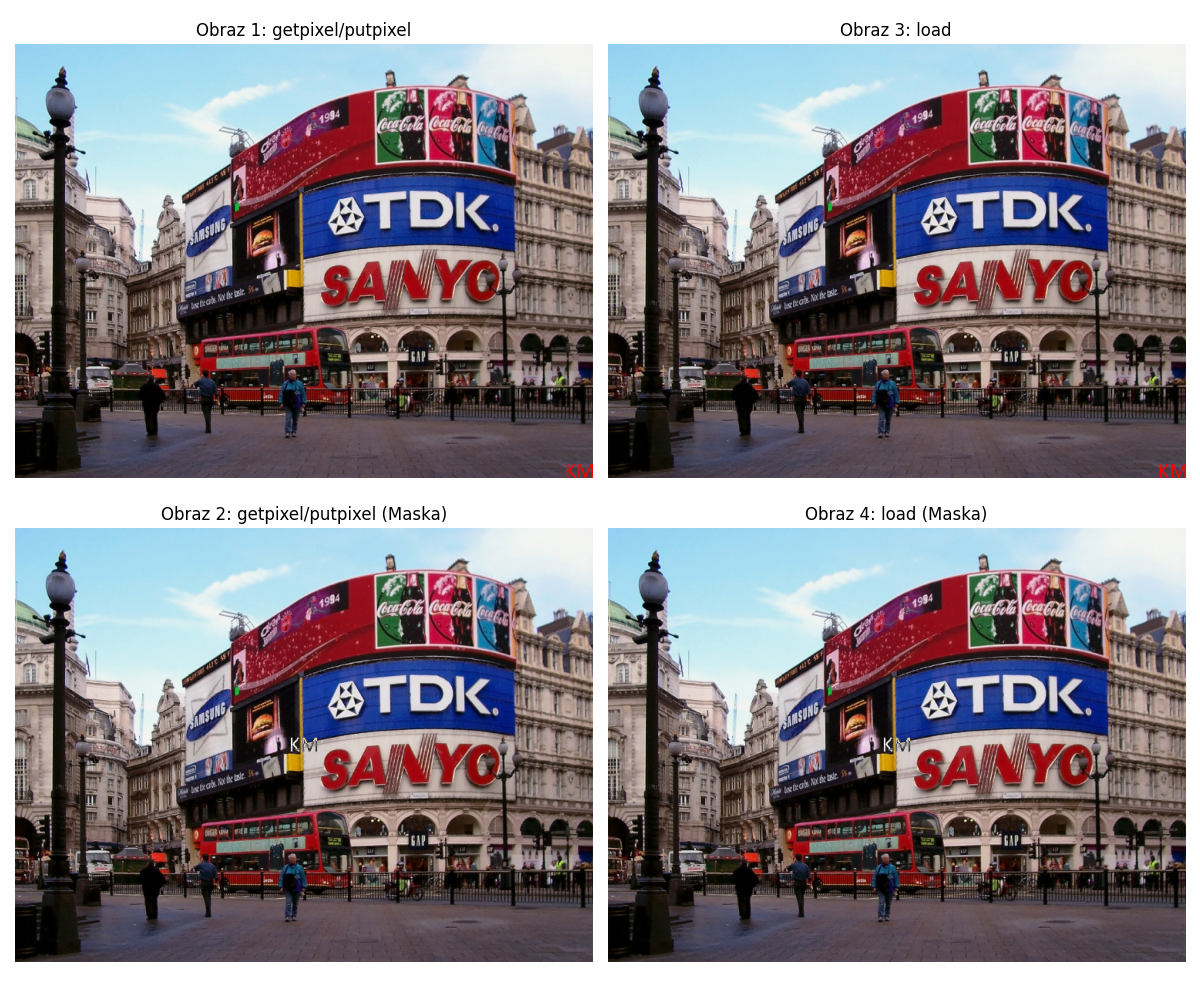

Zad 4A - kontrast

In [257]:
def kontrast(obraz, wsp_kontrastu):
    mn = ((255 + wsp_kontrastu) / 255) ** 2
    return obraz.point(lambda i: 128 + (i - 128) * mn)

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for idx, wsp in enumerate([0, 50, 75, 100]):
    kontrast_img = kontrast(obraz.copy(), wsp)
    axs[idx].imshow(kontrast_img)
    axs[idx].set_title(f"Wsp. kontrastu: {wsp}")
    axs[idx].axis('off')

plt.savefig("fig2.png")
plt.close()


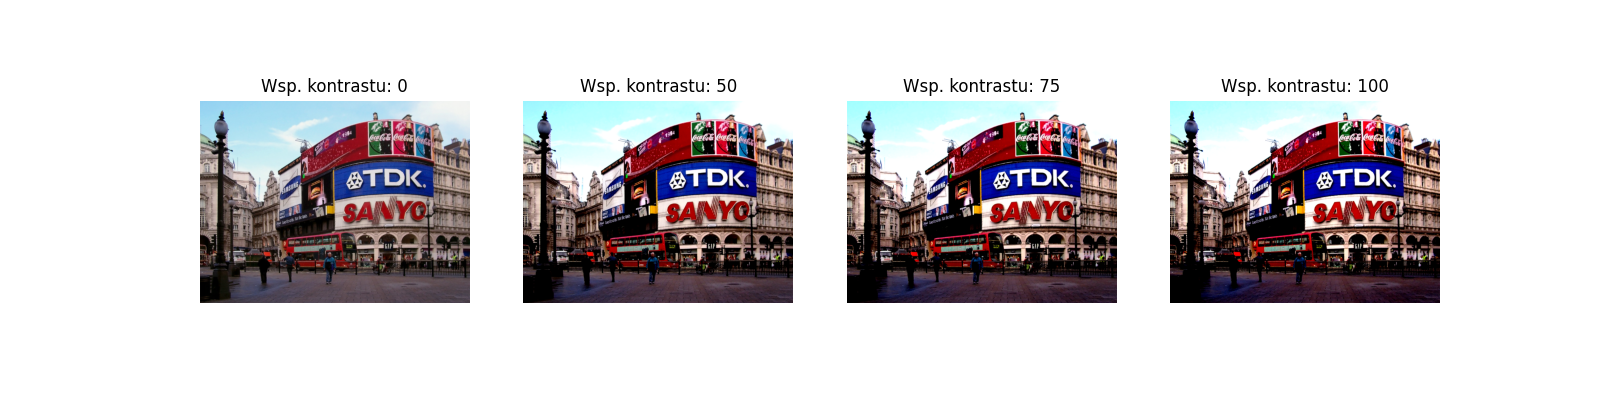

Zad 4B - transf. logarytmiczna

In [258]:
def transformacja_logarytmiczna(obraz):
    return obraz.point(lambda i: int(255 * np.log(1 + i / 255)))

log_img = transformacja_logarytmiczna(obraz.copy())
lin_img = obraz.copy()
lin_img = lin_img.point(lambda i: i * 2 + 100)

fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for idx, img in enumerate([obraz, log_img, lin_img]):
    axs[idx].imshow(img)
    axs[idx].axis('off')

plt.savefig("fig3.png")
plt.close()


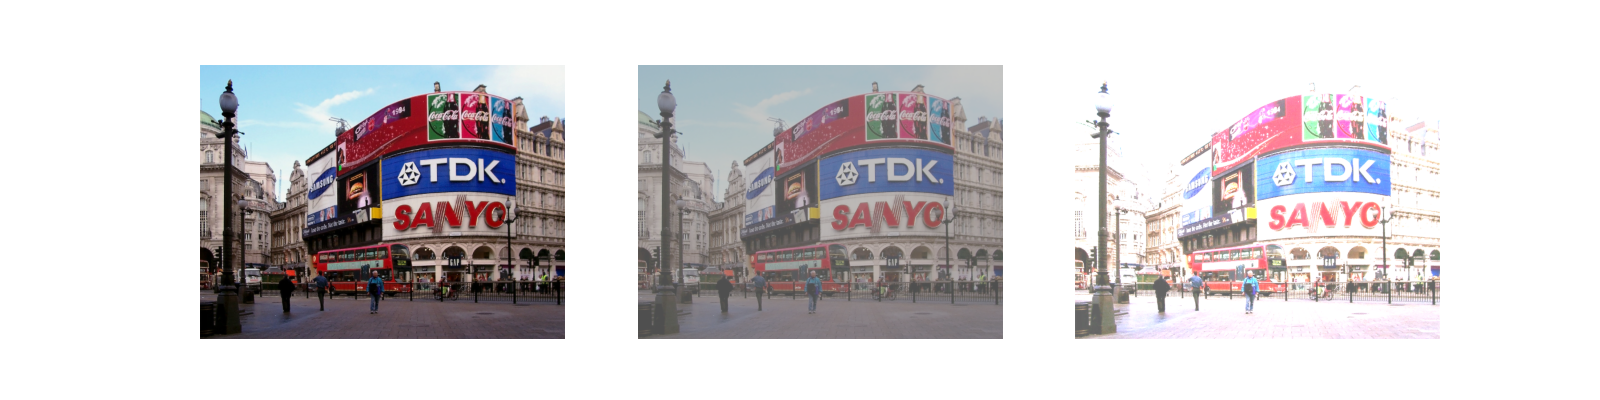

Zad 4C - transf. gamma

In [259]:
def transformacja_gamma(obraz, gamma):
    return obraz.point(lambda i: int((i / 255) ** (1 / gamma) * 255))

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for idx, gamma in enumerate([0.5, 1, 2, 5]):
    gamma_img = transformacja_gamma(obraz.copy(), gamma)
    axs[idx].imshow(gamma_img)
    axs[idx].set_title(f"Gamma: {gamma}")
    axs[idx].axis('off')

plt.savefig("fig4.png")
plt.close()


Wartości gamma wpływają na uzyskany efekt w następujący sposób:

Gamma 0.5: Zwiększa jasność ciemnych obszarów, obraz jest ciemniejszy.

Gamma 1: Brak zmiany, obraz jest taki sam jak oryginalny.

Gamma 2: Zwiększa jasność jasnych obszarów, obraz jest trochę jaśniejszy.

Gamma 5: Zwiększa jasność jasnych obszarów, obraz jest zdecydowanie jaśniejszy od oryginalnego obrazu

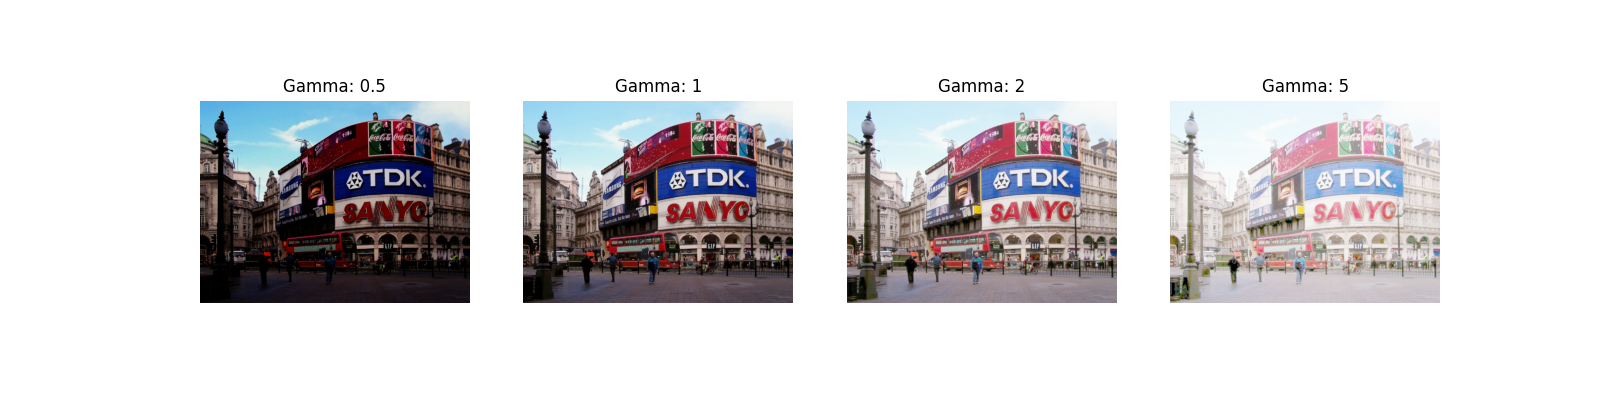

Zad 5

In [260]:

obraz = Image.open("obraz.png")

def array_point_equivalent(obraz, val):
    T = np.array(obraz, dtype='uint8')
    T = np.clip(T + val, 0, 255)
    return Image.fromarray(T, "RGB")


# Metoda 1: np.array i += 100
T = np.array(obraz, dtype='uint8')
T += 100
obraz_wynik1 = Image.fromarray(T, "RGB")
obraz_wynik1.save("obraz_wynik1.png")

# Metoda 2: obraz.point(lambda i: i + 100)
obraz_wynik2 = obraz.point(lambda i: i + 100)
obraz_wynik2.save("obraz_wynik2.png")

# Metoda 3: array_point_equivalent
obraz_wynik3 = array_point_equivalent(obraz, 100)
obraz_wynik3.save("obraz_wynik3.png")

# Wyświetlanie obrazów
obraz_wynik1.show()
obraz_wynik2.show()
obraz_wynik3.show()


In [261]:
obraz = Image.open("obraz.png")

# Metoda 1: np.array i += 100
T = np.array(obraz, dtype='uint8')
T += 100
obraz_wynik1 = Image.fromarray(T, "RGB")

# Metoda 2: obraz.point(lambda i: i + 100)
obraz_wynik2 = obraz.point(lambda i: i + 100)

# Metoda 3: rozjasnij
def rozjasnij(obraz, val):
    T = np.array(obraz, dtype='uint8')
    T = np.clip(T + val, 0, 255)
    return Image.fromarray(T, "RGB")

obraz_wynik3 = rozjasnij(obraz, 100)


fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(obraz)
axs[0].set_title('Oryginalny obraz')
axs[0].axis('off')

axs[1].imshow(obraz_wynik1)
axs[1].set_title('np.array i += 100')
axs[1].axis('off')

axs[2].imshow(obraz_wynik2)
axs[2].set_title('obraz.point(lambda i: i + 100)')
axs[2].axis('off')

axs[3].imshow(obraz_wynik3)
axs[3].set_title('metoda "rozjasnij"')
axs[3].axis('off')

plt.savefig("zad5.png")
plt.close()


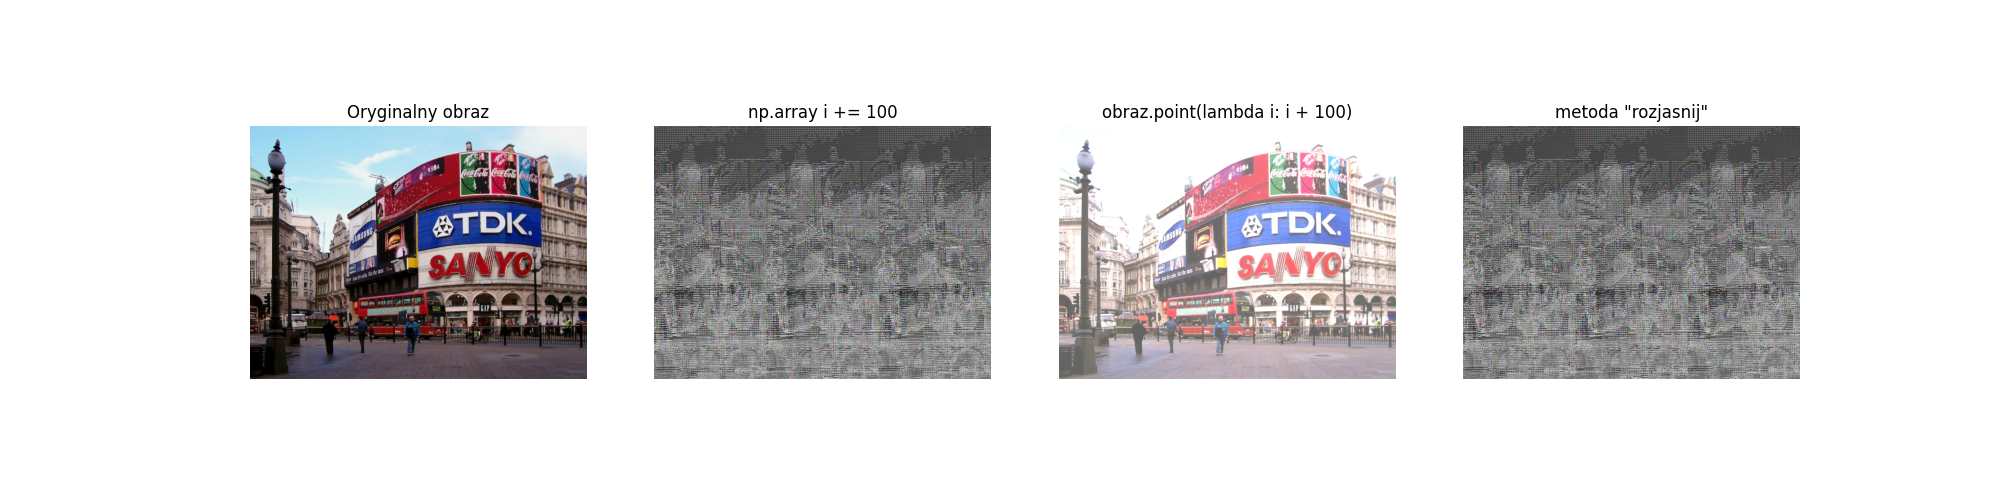

Dlaczego array i += 100 i metoda rozjaśnij nie działają poprawnie:

array i += 100:

Problem: Dodanie 100 do każdego piksela może spowodować przekroczenie maksymalnej wartości 255.

Efekt: Piksele przekraczające 255 "zawijają się" do 0, co prowadzi do 
zniekształceń.

Metoda rozjaśnij:

Problem: Funkcja point automatycznie przycina wartości pikseli do zakresu 0-255, ale array i += 100 tego nie robi.

Efekt: point działa poprawnie, ale array i += 100 może powodować prześwietlenie i zniekształcenia.

obraz.point(lambda i: i + 100):

Opis: Metoda point w Pillow działa bezpieczniej, ponieważ automatycznie przycina wartości pikseli do zakresu 0–255. Gdy wartość piksela po dodaniu przekroczy 255, zostanie ograniczona do 255. Podobnie, wartości mniejsze niż 0 zostaną ograniczone do 0.

Efekt: Dzięki przycinaniu wartości do zakresu 0–255, metoda point zapewnia, że obraz nie będzie prześwietlony ani zniekształcony. W ten sposób osiąga się efekt rozjaśnienia obrazu bez ryzyka przekroczenia zakresu kolorów.